<a href="https://colab.research.google.com/github/chaudha4/ML-Jupyter_Notebook/blob/master/Neural%20Network%20-%2002%20Linear%20Regression%20-%20Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Core Learning Algorithms - Linear Regression
In this notebook we will walk through 4 fundemental machine learning algorithms. 
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

See https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay


In [1]:

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

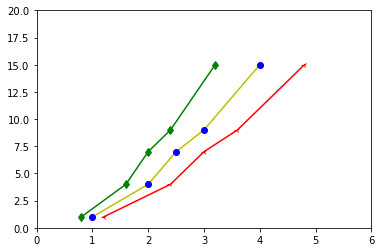

In [2]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(x, y, 'y')  # Plot using Yellow line
plt.plot(x, y, 'bo')  # Plot using Blue o marks

plt.plot(np.array(x) * 1.2, y, 'r3')  # Plot using Red weird marks
plt.plot(np.array(x) * 1.2, y, 'r')  # Plot using Red line

plt.plot(np.array(x) * .8, y, 'gd')  # Plot using diamond marks
plt.plot(np.array(x) * .8, y, 'g')  # Plot using line

plt.axis([0, 6, 0, 20])
plt.show()

In [3]:
np.unique(x)

array([1. , 2. , 2.5, 3. , 4. ])

In [4]:
np.polyfit(x, y, 1)

array([ 4.7 , -4.55])

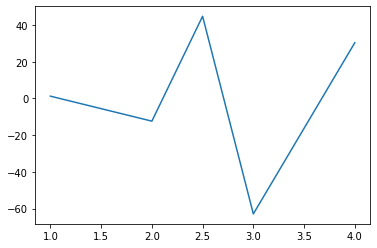

In [5]:
plt.plot(np.unique(x), np.polyfit(x, y, 4))
plt.show()

In [6]:
np.poly1d(x,y)

poly1d([   1. ,  -12.5,   60. , -137.5,  149. ,  -60. ])

In [7]:
np.poly1d(np.polyfit(x, y, 1))(np.unique(x))

array([ 0.15,  4.85,  7.2 ,  9.55, 14.25])

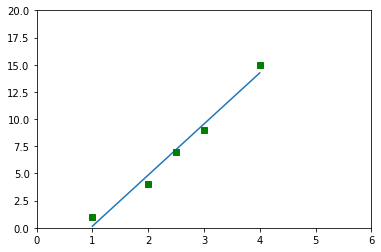

In [8]:
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.plot(x, y, 'gs')  # Plot using Green square marks
plt.axis([0, 6, 0, 20])
plt.show()

In [ ]:
np.unique(x)

array([1. , 2. , 2.5, 3. , 4. ])

In [ ]:
np.poly1d(np.polyfit(x, y, 1))

poly1d([ 4.7 , -4.55])

In [ ]:
np.poly1d(np.polyfit(x, y, 1))(np.unique(x))

array([ 0.15,  4.85,  7.2 ,  9.55, 14.25])

### Training vs Testing Data
When we train models, we need two sets of data: **training and testing**. 

The **training** data is what we feed to the model so that it can develop and learn. It is usually a much larger size than the testing data.

The **testing** data is what we use to evaulate the model and see how well it is performing. We must use a seperate set of data that the model has not been trained on to evaluate it.

In [9]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

In [10]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [11]:
dftrain.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [17]:
print(f"The shape is {dftrain.shape}")
print(f"The Rows is {dftrain.shape[0]}")
print(f"The Columns is {dftrain.shape[1]}")

The shape is (627, 10)
The Rows is 627
The Columns is 10


In [18]:
# Make deep copy of data, if we need to start all over again.
dftrain_bkup = dftrain.copy()
dfeval_bkup = dfeval.copy()

In [19]:
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [20]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [21]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [22]:
# check that backup still has the popped column !!
dftrain_bkup.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


## Evaluate the data

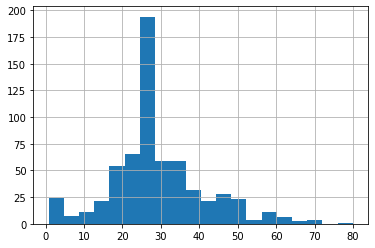

In [23]:
dftrain.age.hist(bins=20)

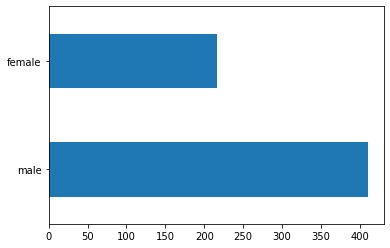

In [24]:
dftrain.sex.value_counts().plot(kind='barh')

In [25]:
dftrain.sex.value_counts()

male      410
female    217
Name: sex, dtype: int64

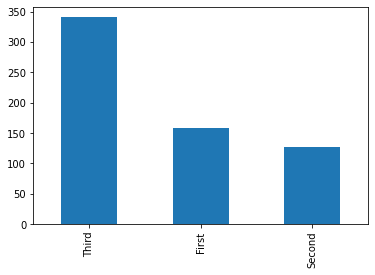

In [26]:
# value_counts will count the unique values of the selected column.
dftrain['class'].value_counts().plot(kind='bar')

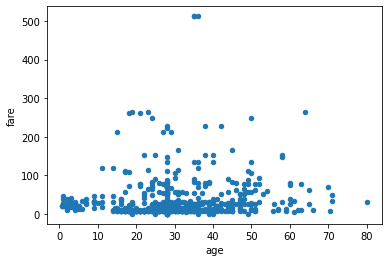

In [27]:
dftrain.plot.scatter("age", "fare")

<AxesSubplot:ylabel='class'>

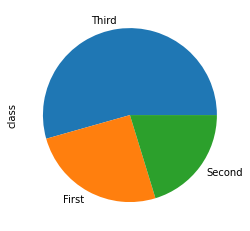

In [ ]:
dftrain['class'].value_counts().plot.pie(y="fare")

## Feature Columns
In our dataset we have two different kinds of information: **Categorical and Numeric**

Our **categorical data** is anything that is not numeric! For example, the sex column does not use numbers, 
it uses the words "male" and "female".

Before we continue and create/train a model we must convet our categorical data into numeric data. We can 
do this by encoding each category with an integer (ex. male = 1, female = 2). 

Fortunately for us TensorFlow has some tools to help!

In [28]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

## Input Function
The TensorFlow model we are going to use requires that the data we pass it comes in as a ```tf.data.Dataset``` object. This means we must create a *input function* that can convert our current pandas dataframe into that object.

Below you'll see a seemingly complicated input function, this is straight from the TensorFlow documentation (https://www.tensorflow.org/tutorials/estimator/linear).

In [33]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  # inner function, this will be returned
  def input_function():
    # create tf.data.Dataset object with data and its label
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      # randomize order of data
      ds = ds.shuffle(1000)
    # split dataset into batches of 32 and repeat process for number of epochs
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

# here we will call the input_function that was returned to us to get a dataset object we can feed to the model
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


## Creating the Model
We are going to use a linear estimator to utilize the linear regression algorithm.

Pre-made Estimators enable you to work at a much higher conceptual level than the base TensorFlow APIs. You no longer have to worry about creating the computational graph or sessions since Estimators handle all the "plumbing" for you. Furthermore, pre-made Estimators let you experiment with different model architectures by making only minimal code changes.

In [34]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpo3agdfbm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Training the Model
Training the model is as easy as passing the input functions that we created earlier.

In [35]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on testing data

clear_output()  # clears console output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.7689394


In [36]:
print(result)

{'accuracy': 0.7689394, 'accuracy_baseline': 0.625, 'auc': 0.83302724, 'auc_precision_recall': 0.7884246, 'average_loss': 0.4763825, 'label/mean': 0.375, 'loss': 0.46672276, 'precision': 0.7111111, 'prediction/mean': 0.35243163, 'recall': 0.64646465, 'global_step': 200}


## Using the Model

Now let's see how we can actually use this model to make predicitons.

We can use the ```.predict()``` method to get survival probabilities from the model. This method will return a list of dicts that store a predicition for each of the entries in our testing data set.

As you can see the survival rate is not very high :/

In [37]:
pred_dicts = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpo3agdfbm/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


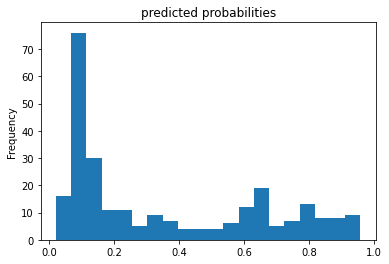

In [38]:
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')